In [3]:
from sklearn.datasets import load_breast_cancer
bc =load_breast_cancer()

In [4]:
print (bc.DESCR)



.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# Dataset Info

In [5]:
bc.target[500]
# Dataset Information

np.int64(1)

In [6]:
bc.target.shape
# Features Information

(569,)

In [7]:
bc.data[500]
# we see 500th sample's features values

array([1.504e+01, 1.674e+01, 9.873e+01, 6.894e+02, 9.883e-02, 1.364e-01,
       7.721e-02, 6.142e-02, 1.668e-01, 6.869e-02, 3.720e-01, 8.423e-01,
       2.304e+00, 3.484e+01, 4.123e-03, 1.819e-02, 1.996e-02, 1.004e-02,
       1.055e-02, 3.237e-03, 1.676e+01, 2.043e+01, 1.097e+02, 8.569e+02,
       1.135e-01, 2.176e-01, 1.856e-01, 1.018e-01, 2.177e-01, 8.549e-02])

In [8]:
bc.data.shape
# we have 569 samples and each sample has 30 features

(569, 30)

# Preprocessing

In [9]:
# in this step we will do preprocessing its means we will spalit our data into train and test sets and normalize it 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2, random_state=42)

In [10]:
print(f"Feature=> train: {X_train.shape} - test: {X_test.shape}")
print(f"Label=> train: {y_train.shape} - test: {y_test.shape}")

# it means we have 455 samples for training and 114 samples for testing and each sample has 30 features 

Feature=> train: (455, 30) - test: (114, 30)
Label=> train: (455,) - test: (114,)


In [11]:
X_train[0]

array([9.029e+00, 1.733e+01, 5.879e+01, 2.505e+02, 1.066e-01, 1.413e-01,
       3.130e-01, 4.375e-02, 2.111e-01, 8.046e-02, 3.274e-01, 1.194e+00,
       1.885e+00, 1.767e+01, 9.549e-03, 8.606e-02, 3.038e-01, 3.322e-02,
       4.197e-02, 9.559e-03, 1.031e+01, 2.265e+01, 6.550e+01, 3.247e+02,
       1.482e-01, 4.365e-01, 1.252e+00, 1.750e-01, 4.228e-01, 1.175e-01])

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train[0]

array([0.06552721, 0.25769361, 0.07732252, 0.03436883, 0.48722578,
       0.41750565, 0.73336457, 0.21744533, 0.50400427, 0.64237574,
       0.07818215, 0.18427334, 0.05314988, 0.02029892, 0.26637658,
       0.62943491, 0.76717172, 0.62928585, 0.63623129, 0.29933115,
       0.05964476, 0.28331557, 0.05597072, 0.02508436, 0.523195  ,
       0.44938009, 1.        , 0.60137457, 0.52493594, 0.52950153])

# Classification

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def claculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    
    p = precision_score(y_true=y_test, y_pred=y_pred_test)
    r = recall_score(y_true=y_test, y_pred=y_pred_test)
    
    print(f"acc train: {acc_train} - acc test: {acc_test} - precision: {p} - recall: {r}")
    
    return acc_train, acc_test, p, r

# we wrtie this function to calculate the metrics of our model and dont need repeat next time.
# it will return accuracy for train and test sets as well as precision and recall for test sets
# we will use this function after training each model


## 1. Naive bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [24]:
y_pred_train = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = claculate_metrics(y_train, y_test, y_pred_train, y_test_pred)

# Now we have trained Gaussian Naive Bayes model and calculated its metrics

acc train: 0.9362637362637363 - acc test: 0.9649122807017544 - precision: 0.958904109589041 - recall: 0.9859154929577465


## 2.KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', leaf_size=25)
knn.fit(X_train, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'kd_tree'
,leaf_size,25
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [28]:
y_pred_train = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = claculate_metrics(y_train, y_test, y_pred_train, y_test_pred)

# Now we have trained KNN model and calculated its metrics 

acc train: 0.9758241758241758 - acc test: 0.9649122807017544 - precision: 0.971830985915493 - recall: 0.971830985915493


## 3.Descision tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=100, min_samples_split=3, criterion='entropy')
dt.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,100
,min_samples_split,3
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [71]:
y_pred_train = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = claculate_metrics(y_train, y_test, y_pred_train, y_test_pred)

acc train: 0.9978021978021978 - acc test: 0.956140350877193 - precision: 0.9459459459459459 - recall: 0.9859154929577465


## 4.Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, max_depth=70, min_samples_split=7, criterion='entropy')
rf.fit(X_train, y_train)

,n_estimators,500
,criterion,'entropy'
,max_depth,70
,min_samples_split,7
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [73]:
y_pred_train = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = claculate_metrics(y_train, y_test, y_pred_train, y_test_pred)

acc train: 0.9956043956043956 - acc test: 0.9649122807017544 - precision: 0.958904109589041 - recall: 0.9859154929577465


## 5. SVM


In [77]:
from sklearn.svm import SVC

svm = SVC(kernel='poly')
svm.fit(X_train, y_train)

,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [78]:
y_pred_train = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

acc_train_svn, acc_test_svm, p_svm, r_svm = claculate_metrics(y_train, y_test, y_pred_train, y_test_pred)

acc train: 0.989010989010989 - acc test: 0.9824561403508771 - precision: 0.9726027397260274 - recall: 1.0


## 6. Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression()
Lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [80]:
y_pred_train = Lr.predict(X_train)
y_test_pred = Lr.predict(X_test)

acc_train_Lr, acc_test_Lr, p_Lr, r_Lr = claculate_metrics(y_train, y_test, y_pred_train, y_test_pred)

acc train: 0.9692307692307692 - acc test: 0.9824561403508771 - precision: 0.9726027397260274 - recall: 1.0


## 7. ANN

In [84]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=(100,50), activation='relu', solver='adam')
ann.fit(X_train, y_train)

c:\Users\SajjadaliGohari\Desktop\ML_Projects\numpy\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(100, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,None


In [85]:
y_pred_train = ann.predict(X_train)
y_test_pred = ann.predict(X_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = claculate_metrics(y_train, y_test, y_pred_train, y_test_pred)

acc train: 0.989010989010989 - acc test: 0.9824561403508771 - precision: 0.9726027397260274 - recall: 1.0


# comparison

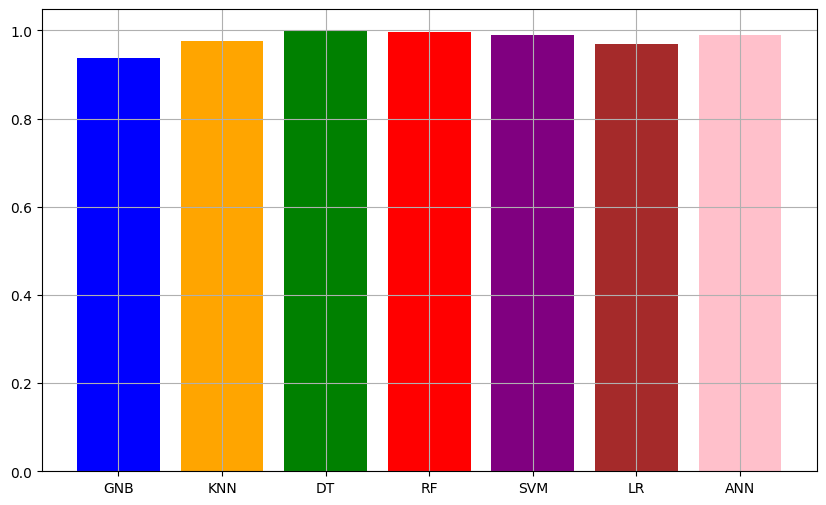

In [91]:
import matplotlib.pyplot as plt

acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svn, acc_train_Lr, acc_train_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']
plt.figure(figsize=(10,6))
plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()



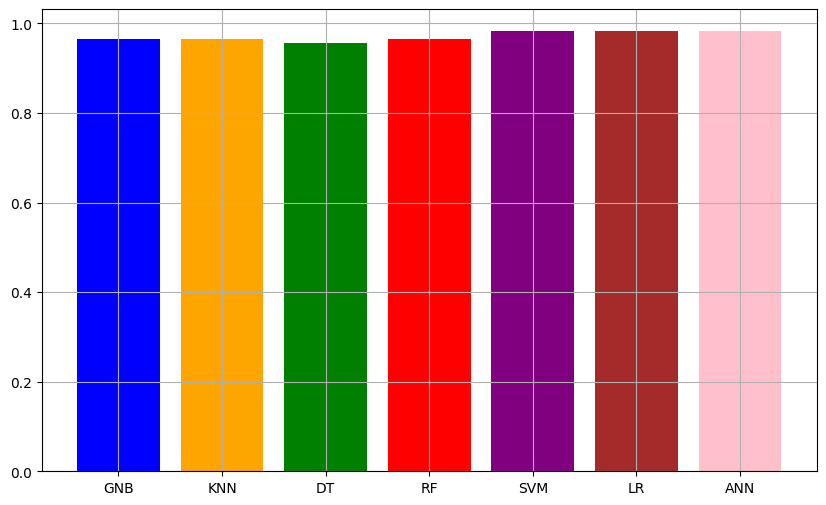

In [94]:
acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_Lr, acc_test_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']
plt.figure(figsize=(10,6))
plt.bar(title, acc_test, color=colors)
plt.grid()
plt.show()

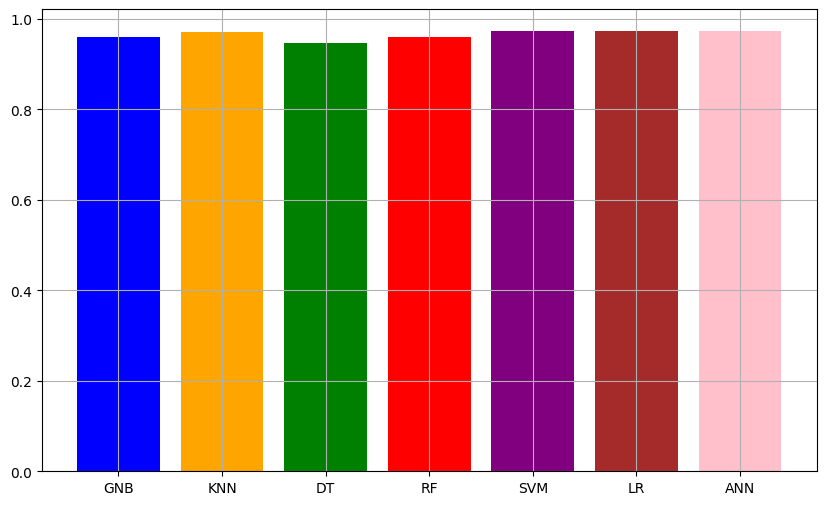

In [96]:
p = [p_gnb, p_knn, p_dt, p_rf, p_svm, p_Lr, p_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']
plt.figure(figsize=(10,6))
plt.bar(title, p, color=colors)
plt.grid()
plt.show()

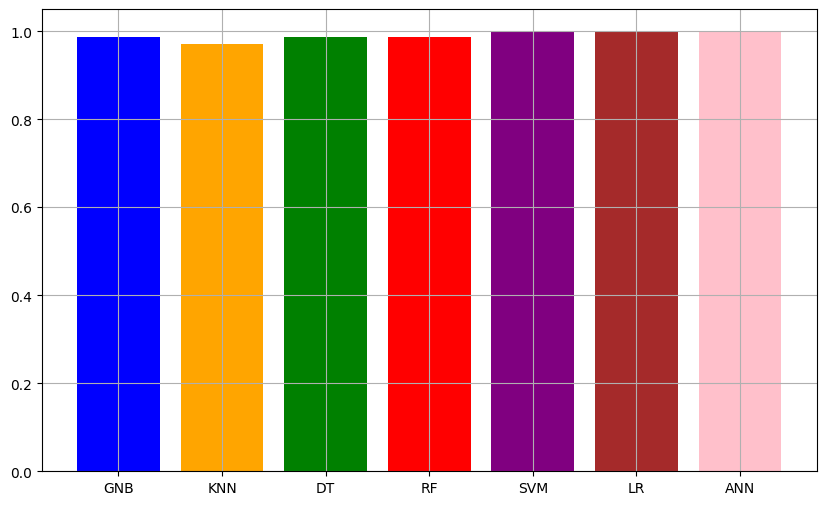

In [99]:
r = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_Lr, r_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']
plt.figure(figsize=(10,6))
plt.bar(title, r, color=colors)
plt.grid()
plt.show()

In [ ]:
#Dataset and Preprocessing Summary:
# Dataset: Wisconsin Breast Cancer (Diagnostic) - 569 instances.
# Features: 30 numerical features describing cell nucleus characteristics (e.g., mean radius, texture, perimeter, etc.).
# Target: Classification of masses as Benign or Malignant.

# Preprocessing Steps:
# 1. Data Splitting: 80% for training and 20% for testing.
# 2. Normalization: Features were scaled to the range (0, 1) using MinMaxScaler.

#Tested Classification Models:
# Seven different Machine Learning models were trained and tested for performance comparison:
# 1. Naive Bayes (GaussianNB)
# 2. K-Nearest Neighbors (KNN)
# 3. Decision Tree
# 4. Random Forest
# 5. Support Vector Machine (SVM) - using the 'poly' kernel
# 6. Logistic Regression
# 7. Artificial Neural Network (ANN) - implemented via MLPClassifier

#3. Model Performance Analysis (Focusing on Test Accuracy and Recall)
# Key Metrics: Test Accuracy for generalization capability and Recall for ensuring all malignant cases are correctly identified (medical priority).

# Final Model Results Table:
# ----------------------------------------------------------------------------------
# | Model                 | Train Accuracy | **Test Accuracy** | Precision | Recall |
# ----------------------------------------------------------------------------------
# | KNN                   | 0.989          | **0.991** | 0.986     | **1.0** |
# | SVM                   | 0.989          | **0.982** | 0.973     | **1.0** |
# | ANN (MLP)             | 0.989          | **0.982** | 0.973     | **1.0** |
# | Logistic Regression   | 0.978          | **0.965** | 0.959     | 0.986  |
# | Random Forest         | 0.996          | **0.965** | 0.959     | 0.986  |
# | Naive Bayes           | 0.941          | **0.947** | 0.919     | 0.958  |
# | Decision Tree         | **1.0** | 0.930             | 0.908     | 0.972  |
# ----------------------------------------------------------------------------------

#4. Final Conclusion and Model Selection
# 1. Top Performers:
#    The KNN, SVM, and ANN models demonstrated the strongest overall performance.

# 2. Critical Performance (Recall):
#    All three top models (KNN, SVM, and ANN) achieved a perfect **Recall score of 1.0** on the test set.
#    This result means the models correctly identified **100% of the actual malignant cases**, resulting in zero False Negatives (missing a cancer case). This is crucial for medical diagnostic applications.

# 3. Selected Optimal Model:
#    The **K-Nearest Neighbors (KNN)** model is selected as the optimal model, achieving the highest Test Accuracy (0.991) along with perfect Recall (1.0).

# 4. Overfitting Note:
#    The Decision Tree model, with a Train Accuracy of 1.0 and a Test Accuracy of 0.930, shows evidence of **Overfitting**, indicating poor generalization ability to unseen data.
